In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [82]:
data=tf.keras.datasets.mnist

In [83]:
data

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [84]:
(x_train,y_train),(x_test,y_test)= data.load_data()

In [85]:
x_train.shape

(60000, 28, 28)

In [86]:
x_test.shape

(10000, 28, 28)

In [87]:
x_train[1].max()

255

In [88]:
x_train[1].min()

0

In [89]:
y_train.shape

(60000,)

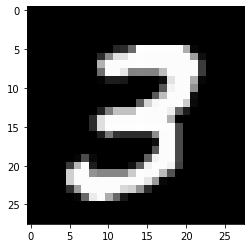

In [90]:
plt.imshow(x_train[7],cmap='gray')

In [91]:
y_train[7]

3

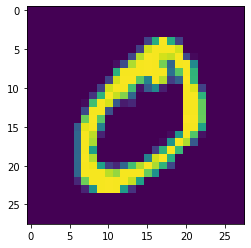

In [92]:
plt.imshow(x_train[1])

In [93]:
y_train[1]

0

In [94]:
x_train=x_train/255
x_test=x_test/255

In [95]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [96]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(392,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [97]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [98]:
model.fit(x_train,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2075 - accuracy: 0.9386
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9910


In [99]:
y_pred= model.predict_classes(x_test)

In [100]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [101]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)


0.9783

In [103]:
confusion_matrix(y_pred,y_test)

array([[ 970,    0,    5,    0,    0,    2,    4,    1,    2,    2],
       [   1, 1129,    5,    0,    0,    0,    3,    4,    0,    3],
       [   0,    0,  989,    0,    2,    0,    2,    6,    0,    0],
       [   2,    2,    8, 1004,    1,   23,    1,    1,    7,    3],
       [   1,    0,    1,    0,  960,    2,    6,    1,    2,    5],
       [   0,    0,    0,    1,    0,  854,    3,    0,    3,    2],
       [   1,    1,    2,    0,    3,    2,  935,    0,    1,    0],
       [   1,    0,    9,    2,    1,    2,    0, 1000,    2,    2],
       [   4,    3,   13,    3,    1,    6,    4,    4,  950,    0],
       [   0,    0,    0,    0,   14,    1,    0,   11,    7,  992]])

In [104]:
model.save('model_digitRecog.h5')